In [248]:
import pandas as pd # obvious imports.
import numpy as np
import matplotlib.pyplot as plt
import csv
import random as random
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D

oec = pd.read_csv("oec.csv") # load .csv file

massSemiMajor = oec[["pl_hostname", "pl_letter", "pl_orbsmax", "pl_bmassj"]]

#Logs all values of orbital radius and mass for each exo-planet
for j in range(len(massSemiMajor)): 
        massSemiMajor.at[j , 'pl_orbsmax'] = math.log(massSemiMajor.loc[j, 'pl_orbsmax'], 10)
        massSemiMajor.at[j , 'pl_bmassj'] = math.log(massSemiMajor.loc[j, 'pl_bmassj'], 10)

#Removes all exo-planets which have missing data
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_orbsmax'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_bmassj'])]
#massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_discmethod'])]

In [249]:
#Calculates a given euclidean distance for a two given points (2D)
def euclidean(xp, yp, xc, yc):
    return ((xp-xc)**2 +(yp-yc)**2)**(1/2)

In [254]:
#Randomly generates k number of centroids
k = 4
centroids = []
for i in range(k):
    centroids.append([random.uniform(-1.5, 1.5), random.uniform(-3, 1)])

#How many times to run the program, accuracy increases over time
epochs = 30
for i in range(epochs):
    #Holds all the x and y coordinates for each member of a centroid
    centroidMembers = []
    for i in range(k):
        centroidMembers.append([])
    
    #Iterates over all the exo-planets with a mass and orbital radius, adding to the centroid which has the shortest
    #euclidean distance
    for index, row in massSemiMajor.iterrows():
        euclideanDistances = []
        for i in range(k):
            euclideanDistances.append(euclidean(row['pl_orbsmax'], row['pl_bmassj'], centroids[i][0], centroids[i][1]))
        
        x = euclideanDistances.index(min(euclideanDistances))
        centroidMembers[x].append([row['pl_orbsmax'], row['pl_bmassj']])
        massSemiMajor.at[index , 'pl_class'] = x
            
    #Adds all X and Y values to seperate arrays to make it easier to calculate the new centroid values
    centroidMembersX = []
    centroidMembersY = []
    
    for z in range(k):
        xList = []
        yList = []
        for m in range(len(centroidMembers[z])):
            xList.append(centroidMembers[z][m][0])
            yList.append(centroidMembers[z][m][1])
            
        centroidMembersX.append(xList)
        centroidMembersY.append(yList)
    
    #Calculate new centroids, which are the midpoint of all current values in a given centroid 
    centroidMembersX.sort()
    centroidMembersY.sort()
    for h in range(k):
        centroids[h][0] = (centroidMembersX[h][len(centroidMembersX[h]) - 1] + centroidMembersX[h][0]) / 2
        centroids[h][1] = (centroidMembersY[h][len(centroidMembersY[h]) - 1] + centroidMembersY[h][0]) / 2

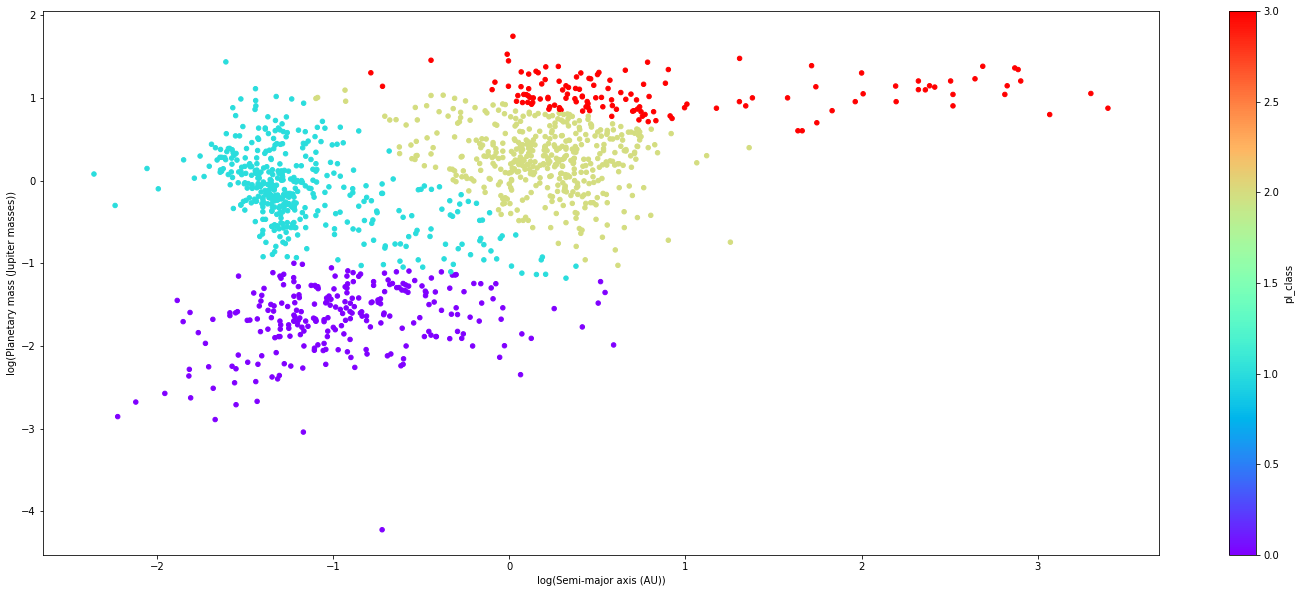

In [255]:
fig, ax = plt.subplots()

massSemiMajor.plot(kind='scatter',x='pl_orbsmax', y='pl_bmassj', c='pl_class', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph

ax.set_xlabel("log(Semi-major axis (AU))")
ax.set_ylabel("log(Planetary mass (Jupiter masses))")

plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.

The above graph shows exo-planet clustering, with log of the planetary mass against log of the orbital radius. The K-Means clustering algorithm has been used to colour code the clusters for ease of use.

According to the NASA website, the bottom cluster are rocky planets which are possible candidates for habitablity. Whereas the top left cluster are what are known as 'hot jupiters', a class of gas giant which is physically similar to Jupiter but with a higher surface temperature due to being close to the star. The clusters to the right of 'hot jupiters' are cold gas giants.

Since gas giants are not suitable for supporting life we can exclude them and produce a list of possible rocky planets which can be further anaylsed to determine their habitability.

In [259]:
massSemiMajor[massSemiMajor['pl_class']==0]

,pl_hostname,pl_letter,pl_orbsmax,pl_bmassj,pl_class
28,55 Cnc,e,-1.811353,-1.594824,0.0
31,61 Vir,b,-1.299288,-1.795880,0.0
32,61 Vir,c,-0.662541,-1.244125,0.0
33,61 Vir,d,-0.322393,-1.142668,0.0
52,BD-06 1339,b,-1.368556,-1.568636,0.0
54,BD-08 2823,b,-1.221849,-1.397940,0.0
77,CoRoT-22,b,-1.036212,-1.420216,0.0
79,CoRoT-24,b,-1.251812,-1.744727,0.0
80,CoRoT-24,c,-1.008774,-1.055517,0.0
91,CoRoT-7,c,-1.337242,-1.577903,0.0
